Continuing the network and word frequency analysis , in this project we will perform a comprehensive analysis of Elon Musk's tweets from 2017 to 2022, focusing on word frequency and bigram relationships. The dataset consists of tweets collected from Elon Musk's Twitter account, organized by year. Each year's tweets will be treated as a single document for the purposes of this analysis.

The project will be broken down into the following key tasks:

- Word Frequency Analysis: Compute the frequency of each word in the tweets for each year, excluding common stop words to focus on the most significant terms.
- Top Words Identification: Identify and display the top 10 most frequent words for each year, providing insight into the key topics and themes in Musk's tweets during that time.
- Histogram Plotting: Create histograms to visualize the distribution of word frequencies for each year, highlighting the variation in word usage over time.
- Zipf’s Law Application: Apply Zipf’s law to the word frequencies and generate log-log plots of word frequency versus rank for each year, examining the adherence to this linguistic principle.
- Bigram Network Analysis: Construct and visualize bigram networks for each year, illustrating the co-occurrence relationships between pairs of words and identifying prominent word pairs.

# **Task 2:  Data analysis of Elon Musk tweets from 2017-2022.**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import zipfile
import re

import itertools
import collections

import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.stem import WordNetLemmatizer

import seaborn as sns
from matplotlib import pyplot as plt

import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/1. My Masters course/FDA/NLP/archive.zip'

In [ ]:
# unzipping folder and reading the equity_value_data.csv file along with features_data.csv
zp = zipfile.ZipFile(path)

In [ ]:
# downloading list of stopwords using nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords') # downloading stopword corpus
sw = list(stopwords.words('english'))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# making a function to perform preprocessing

def preprocessing(tweets,biagram,top_n):
    # removing all the words starting with @
    def remove_at_rate(txt):
        return " ".join(re.sub("@[A-Za-z0-9_]+", "", txt).split())

    tweets = [remove_at_rate(tweet) for tweet in tweets]

    # removing all the words starting with #
    def remove_hash(txt):
        return " ".join(re.sub("#[A-Za-z0-9_]+", "", txt).split())

    tweets = [remove_hash(tweet) for tweet in tweets]

    # removing all the words starting with &
    def remove_amp(txt):
        return " ".join(re.sub("&[A-Za-z0-9_]+", "", txt).split())

    tweets = [remove_amp(tweet) for tweet in tweets]

    # removing URLs and symbols
    def remove_url(txt):
        return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

    tweets = [remove_url(tweet) for tweet in tweets]

    # to lower case and splitting
    tweets = [tweet.lower().split() for tweet in tweets]

    # removing stopwords

    tweets = [[word for word in each_list if not word in sw] for each_list in tweets]

    #tweets

    #lemmatizing
    wl = WordNetLemmatizer()
    tweets = [[wl.lemmatize(word) for word in each_list] for each_list in tweets]

    if biagram == True:
      # Create list of lists containing bigrams in tweets
      tweets = [list(bigrams(tweet)) for tweet in tweets]
      unique_words = list(itertools.chain(*tweets))
      word_fre = collections.Counter(unique_words)
      #all_biagrams = [(key, value) for key, value in word_fre.items()]
      #return all_biagrams
      return word_fre.most_common(top_n)
    else:
      # counting frequency of each word in the corpus
      unique_words = list(itertools.chain(*tweets))
      word_fre = collections.Counter(unique_words)
      word_fre_all = [(key, value) for key, value in word_fre.items()]
      return word_fre_all

In [ ]:
files=zp.namelist()

df_all_words_fre = pd.DataFrame(columns=['year','words', 'count'])

for i in files[7:]:
    df = pd.read_csv(zp.open(i))
    tweets = df['tweet'].tolist()
    all_words = preprocessing(tweets,False,0)
    all_words = [[i.split(".")[0],j,k] for j, k in all_words]
    df_temp_all = pd.DataFrame(all_words,columns=['year','words', 'count'])
    df_all_words_fre = pd.concat([df_all_words_fre, df_temp_all], axis=0,ignore_index = True)

### **1.Compute word frequencies for each year. Exclude the stop words**

In [ ]:
# word frequency for each year from 2017 to 2022 in a dataframe
df_all_words_fre['count'] = pd.to_numeric(df_all_words_fre['count'])
df_all_words_fre['word_frequency'] = df_all_words_fre['count'] / df_all_words_fre.groupby('year')['count'].transform('sum')
df_all_words_fre

,year,words,count,word_frequency
0,2017,coming,56,0.002172
1,2017,soon,67,0.002599
2,2017,vastly,4,0.000155
3,2017,better,58,0.002250
4,2017,mapsnav,1,0.000039
...,...,...,...,...
38118,2022,touch,2,0.000376
38119,2022,generation,2,0.000376
38120,2022,age,2,0.000376
38121,2022,roaring,2,0.000376


### **2.Show top 10 words (for each year) by the highest value of word frequency**

In [ ]:
df_top10 = df_all_words_fre.sort_values('count',ascending = False).groupby('year').head(10)
df_top10 = df_top10.sort_values(['year','count'],ascending = [True,False]).reset_index(drop=True)
df_top10.reset_index(drop=True,inplace=True)
df_top10

,year,words,count,word_frequency
0,2017,tesla,304,0.011791
1,2017,model,208,0.008067
2,2017,good,173,0.006710
3,2017,car,173,0.006710
4,2017,rocket,163,0.006322
5,2017,like,140,0.005430
6,2017,yes,132,0.005120
7,2017,launch,122,0.004732
8,2017,time,103,0.003995
9,2017,next,103,0.003995


### 3.Plot histogram of word frequencies for each year

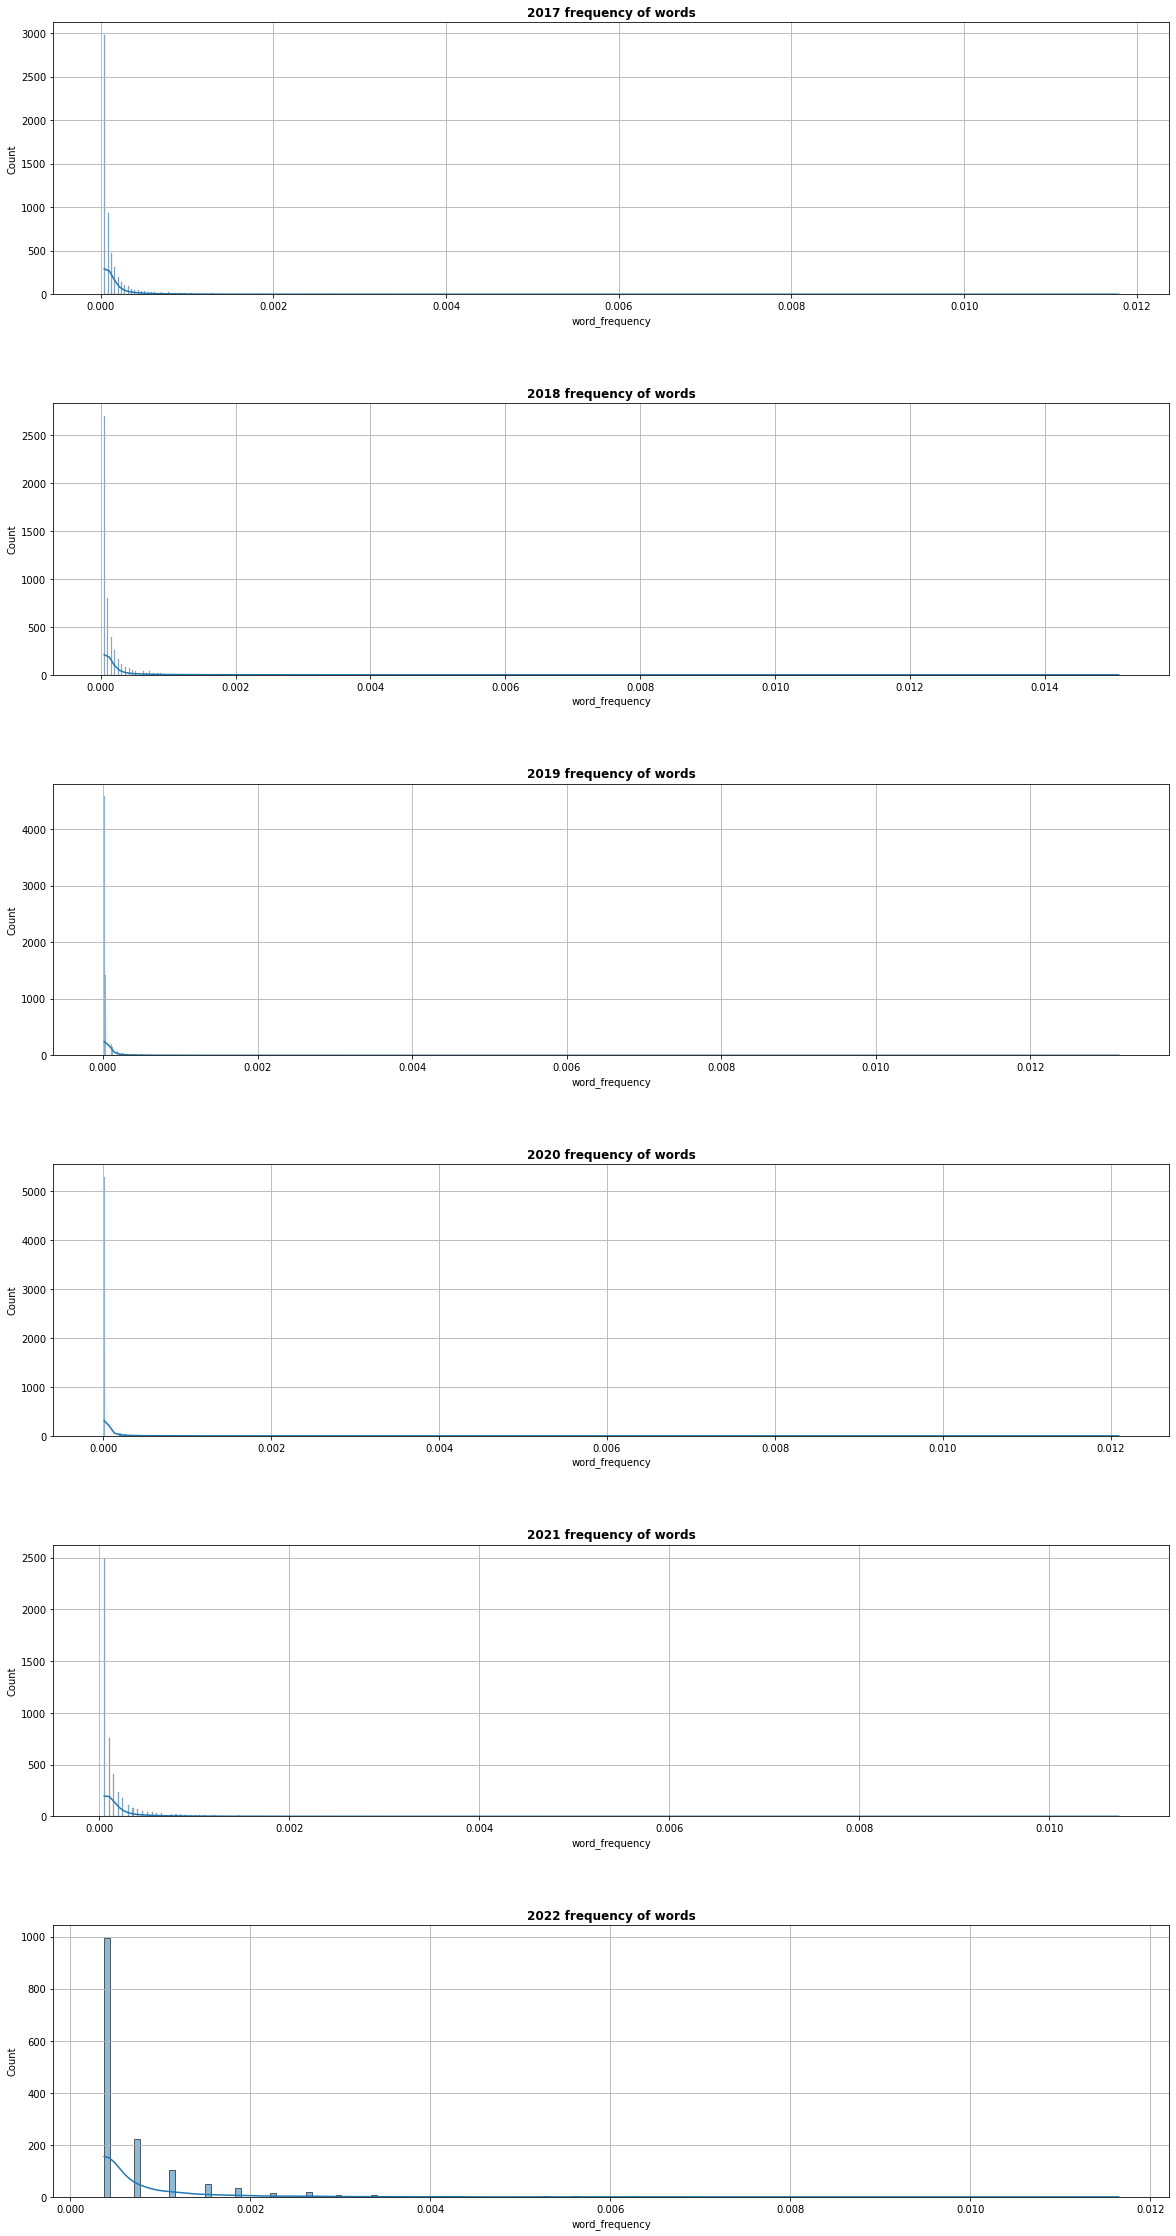

In [ ]:
# plotting histogram with highest frequency for each year

plt.figure(figsize = (20,40))
for i,year in enumerate(df_all_words_fre['year'].unique()):
    plt.subplot(6,1,i+1)
    plt.subplots_adjust(wspace=0.6,hspace=0.4)
    sns.histplot(x='word_frequency',\
                 data=df_all_words_fre[df_all_words_fre['year'] == year], palette='rainbow',kde=True)
    plt.title(year+" frequency of words",fontweight="bold")
    plt.grid()

### 4. **Use Zipf’s law and plot log-log plots of word frequencies and rank for each year**

In [ ]:
ordered_df = df_all_words_fre.sort_values(by = ['year','word_frequency'], ascending = [True, False]).reset_index(drop = True)
ordered_df['rank'] = 0
r = 1
yr = '2017'
for i, row in ordered_df.iterrows():
  if row.year == yr:
    ordered_df.at[i,'rank'] = r
    r+=1
  else:
    r = 1
    yr = row.year
    ordered_df.at[i,'rank'] = r
    r+=1

ordered_df


,year,words,count,word_frequency,rank
0,2017,tesla,304,0.011791,1
1,2017,model,208,0.008067,2
2,2017,car,173,0.006710,3
3,2017,good,173,0.006710,4
4,2017,rocket,163,0.006322,5
...,...,...,...,...,...
38118,2022,touch,2,0.000376,1460
38119,2022,generation,2,0.000376,1461
38120,2022,age,2,0.000376,1462
38121,2022,roaring,2,0.000376,1463


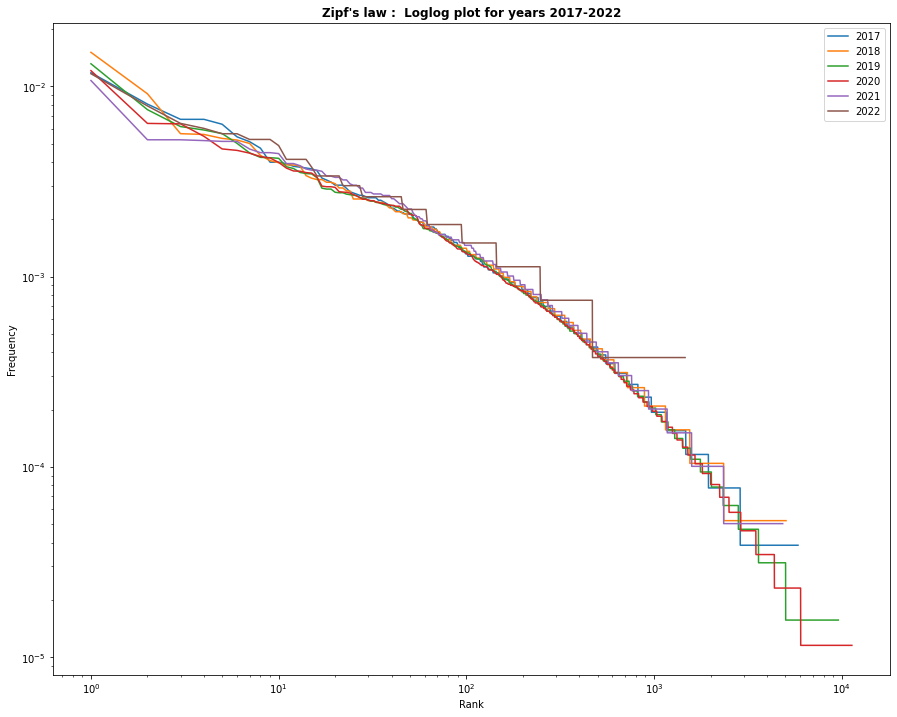

In [ ]:
#Plotting the distribution

fig, ax = plt.subplots(figsize=(15,12))
ax.loglog(ordered_df[ordered_df['year']=='2017']['rank'].values,ordered_df[ordered_df['year']=='2017']['word_frequency'].values, label= '2017')
ax.loglog(ordered_df[ordered_df['year']=='2018']['rank'].values,ordered_df[ordered_df['year']=='2018']['word_frequency'].values, label = '2018')
ax.loglog(ordered_df[ordered_df['year']=='2019']['rank'].values,ordered_df[ordered_df['year']=='2019']['word_frequency'].values, label = '2019')
ax.loglog(ordered_df[ordered_df['year']=='2020']['rank'].values,ordered_df[ordered_df['year']=='2020']['word_frequency'].values, label = '2020')
ax.loglog(ordered_df[ordered_df['year']=='2021']['rank'].values,ordered_df[ordered_df['year']=='2021']['word_frequency'].values, label = '2021')
ax.loglog(ordered_df[ordered_df['year']=='2022']['rank'].values,ordered_df[ordered_df['year']=='2022']['word_frequency'].values, label = '2022')


plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's law :  Loglog plot for years 2017-2022", fontweight="bold")

leg = ax.legend();
plt.show()

### **5.Create bigram network graphs for each year**

We have made the Bigram plot for top 100 Bigrams for each year. However, we can change the Number of bigrams required in following code:

*   top_biagrams = preprocessing(tweets,True,100)



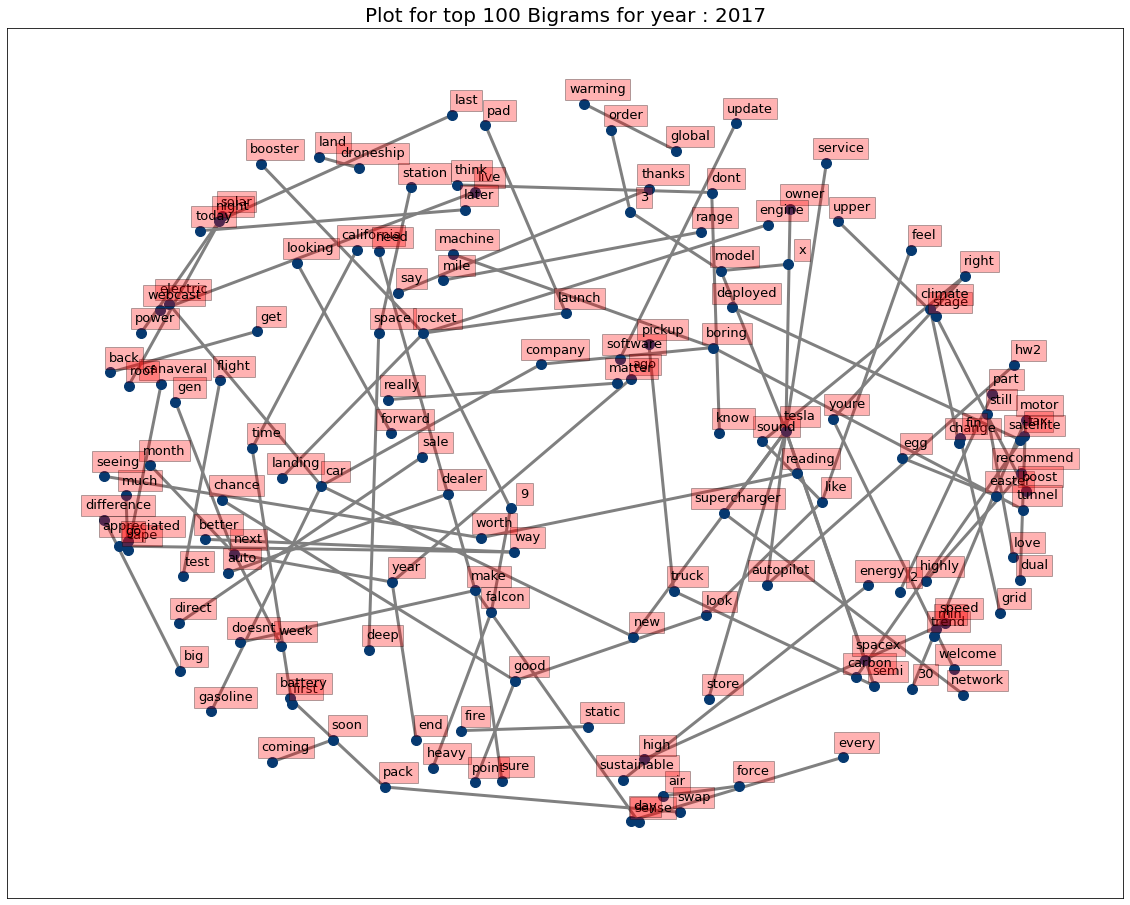

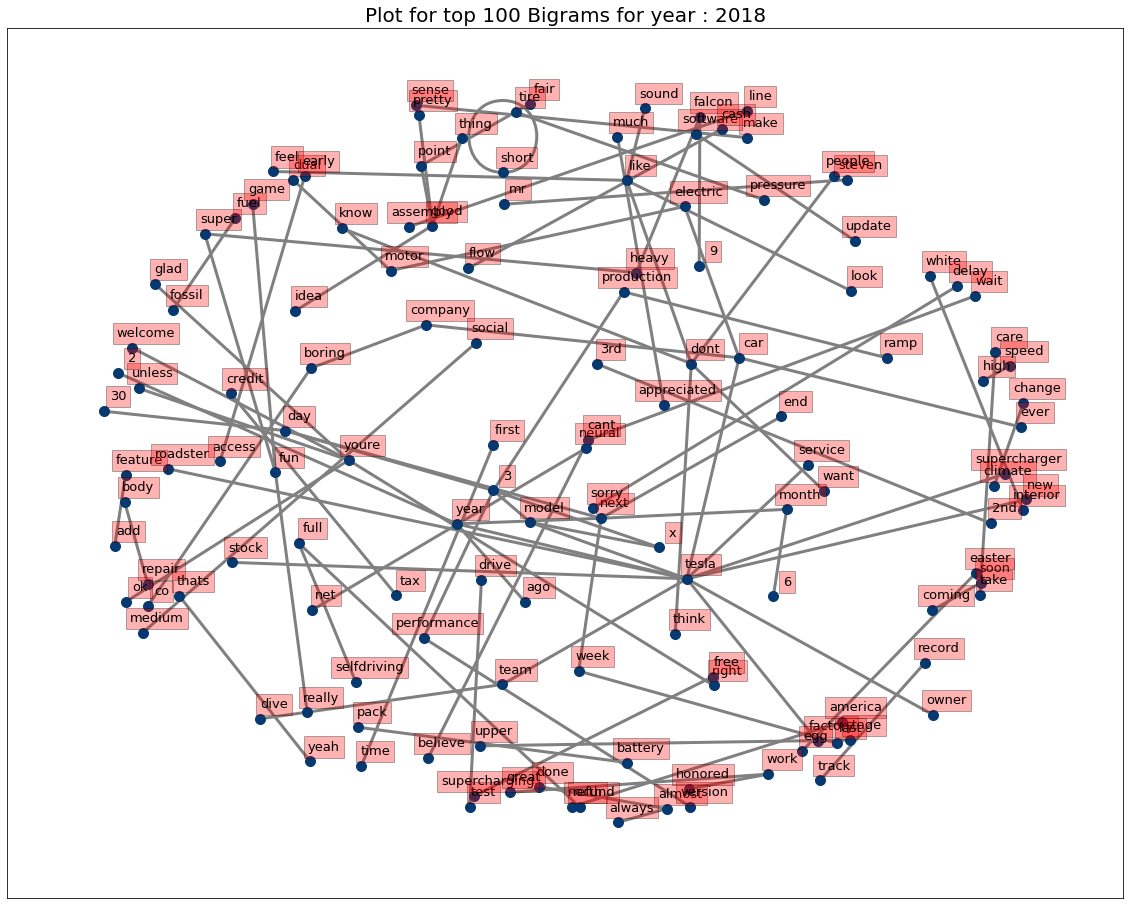

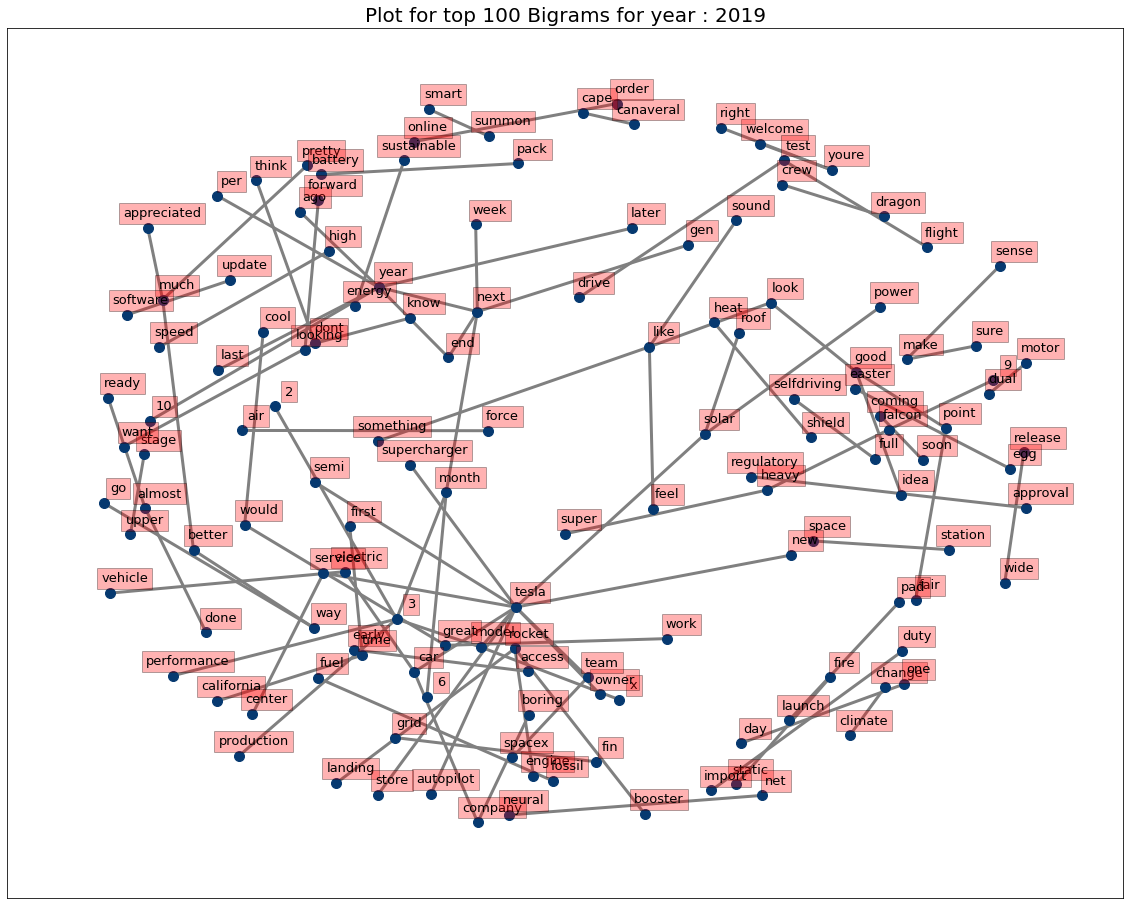

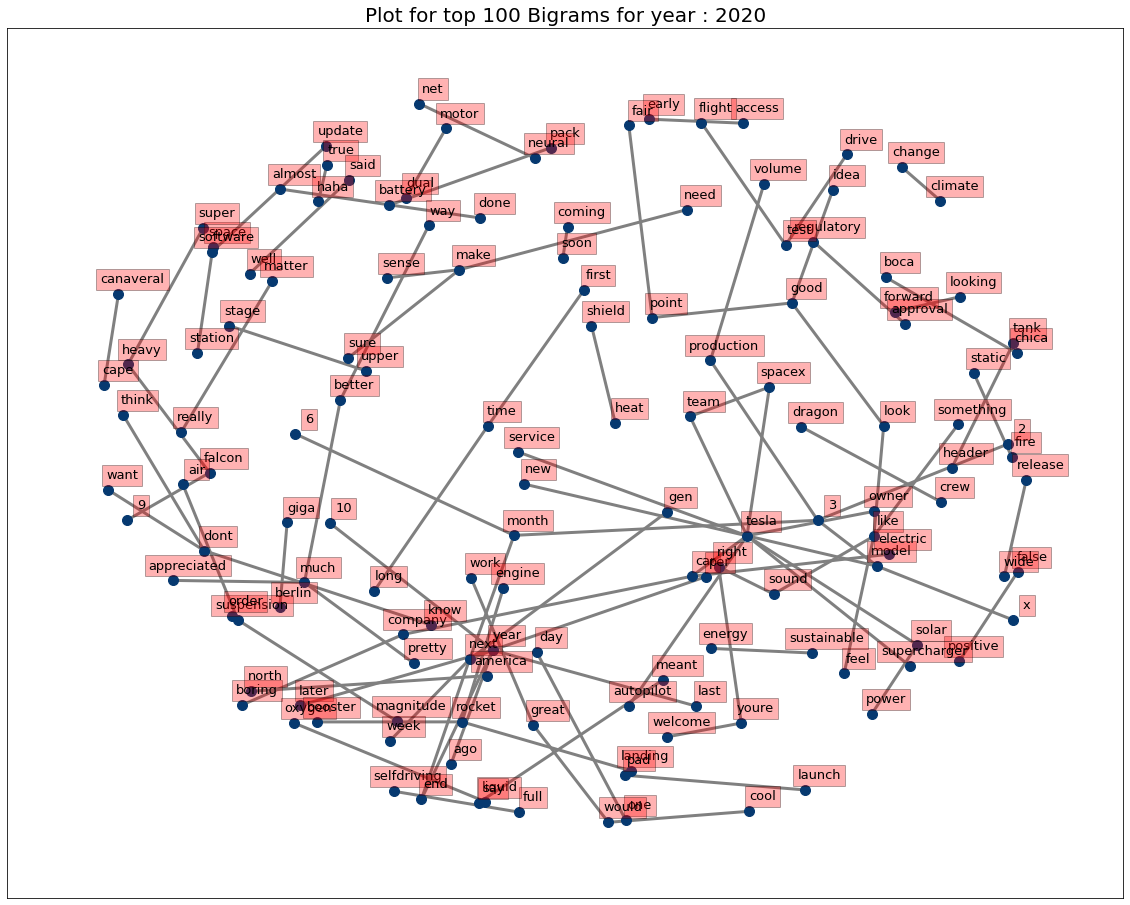

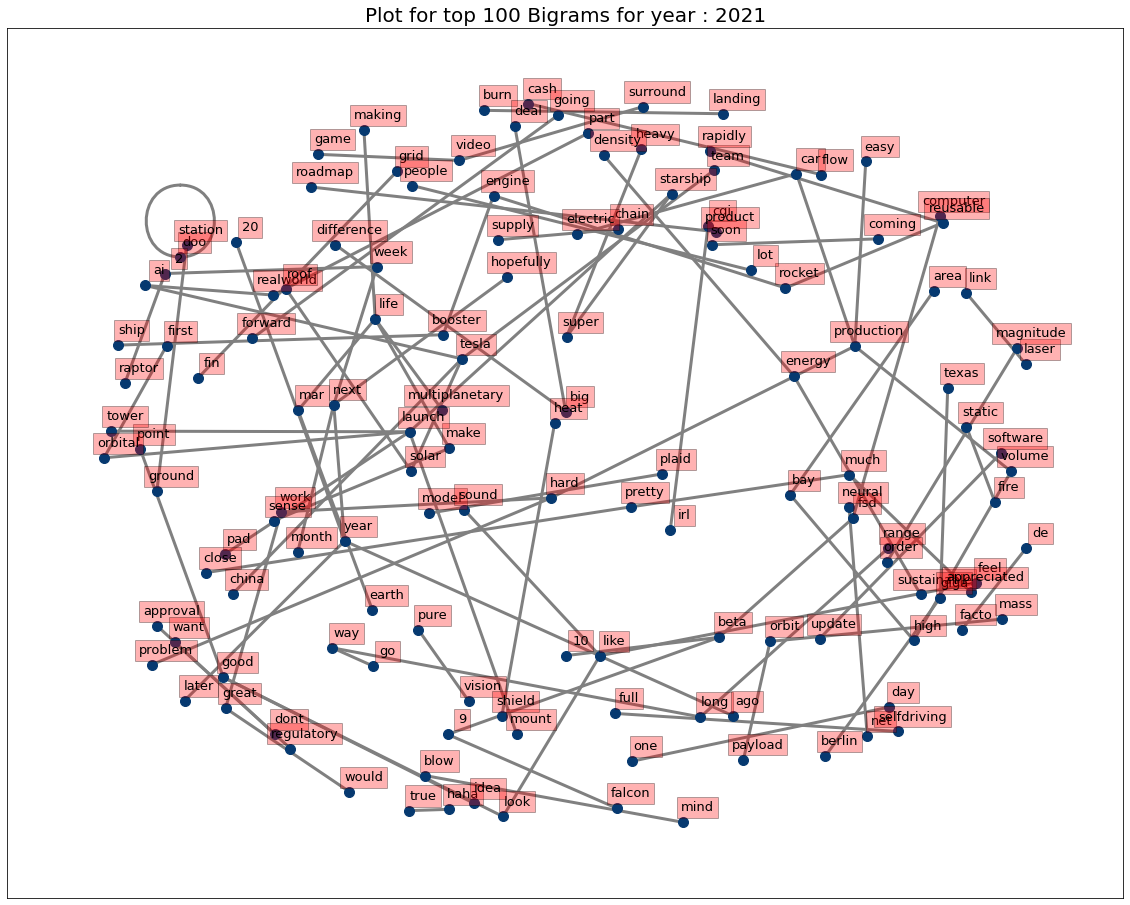

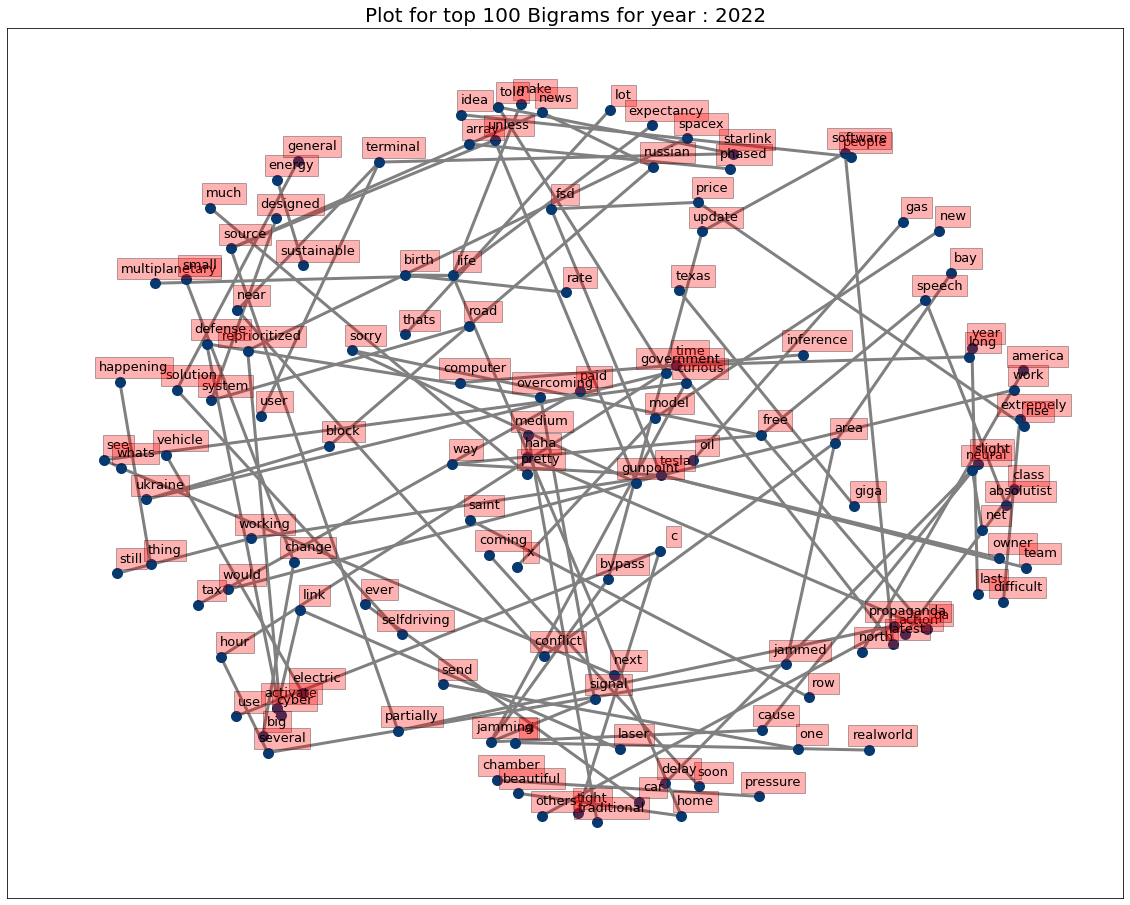

In [ ]:
files=zp.namelist()

for i in files[7:]:
    df = pd.read_csv(zp.open(i))
    tweets = df['tweet'].tolist()
    top_biagrams = preprocessing(tweets,True,100)
    df_top_words_biagram = pd.DataFrame(top_biagrams,columns=['biagram_words', 'count'])
    dic = df_top_words_biagram.set_index('biagram_words').T.to_dict('records')

    #making network graph
    ntw = nx.Graph()
    # Create connections between nodes
    for k, v in dic[0].items():
      ntw.add_edge(k[0], k[1], weight=(v * 7))

    fig, ax = plt.subplots(figsize=(20, 16))
    pos = nx.spring_layout(ntw, k=2)

    # Plot networks
    nx.draw_networkx(ntw, pos, width=3, node_size = 100,
                 edge_color='grey', node_color='#063970',
                 with_labels = False,ax=ax)
    # Create offset labels
    for key, value in pos.items():
      x, y = value[0]+0.03, value[1]+0.03
      ax.text(x, y,s=key,
            bbox=dict(facecolor='red', alpha=0.3),
            horizontalalignment='center', fontsize=13)
    plt.title("Plot for top 100 Bigrams for year : " + str(i.split(".")[0]), fontsize = 20)
    plt.show()
    print('\n')